In [1]:
from huggingface_hub import hf_hub_download, login
import os, shutil, numpy as np

In [2]:
repo_id = "samitizerxu/openfwi"
subfolder = "FlatVel_A"

for prefix in ["data", "model"]:
    for i in range(1, 6):
        fname = f"{subfolder}/{prefix}/{prefix}{i}.npy"
        out_path = os.path.join(subfolder, prefix, f"{prefix}{i}.npy")
        os.makedirs(os.path.dirname(out_path), exist_ok=True)
        # download to cache
        cache_path = hf_hub_download(repo_id=repo_id, filename=fname, repo_type="dataset")
        # copy to local folder
        shutil.copy(cache_path, out_path)

# verify existence and load
data_path = os.path.join(subfolder, "data", "data1.npy")
model_path = os.path.join(subfolder, "model", "model1.npy")

print("Exists:", os.path.exists(data_path), os.path.exists(model_path))
data = np.load(data_path)
model = np.load(model_path)
print("Shapes:", data.shape, model.shape)

Exists: True True
Shapes: (500, 5, 1000, 70) (500, 1, 70, 70)


In [3]:
repo_id = "samitizerxu/openfwi"
subfolder = "FlatVel_B"

for prefix in ["data", "model"]:
    for i in range(1, 6):
        fname = f"{subfolder}/{prefix}/{prefix}{i}.npy"
        out_path = os.path.join(subfolder, prefix, f"{prefix}{i}.npy")
        os.makedirs(os.path.dirname(out_path), exist_ok=True)
        # download to cache
        cache_path = hf_hub_download(repo_id=repo_id, filename=fname, repo_type="dataset")
        # copy to local folder
        shutil.copy(cache_path, out_path)

# verify existence and load
data_path = os.path.join(subfolder, "data", "data1.npy")
model_path = os.path.join(subfolder, "model", "model1.npy")

print("Exists:", os.path.exists(data_path), os.path.exists(model_path))
data = np.load(data_path)
model = np.load(model_path)
print("Shapes:", data.shape, model.shape)

Exists: True True
Shapes: (500, 5, 1000, 70) (500, 1, 70, 70)


In [4]:
repo_id = "samitizerxu/openfwi"
subfolder = "CurveVel_A"

for prefix in ["data", "model"]:
    for i in range(1, 6):
        fname = f"{subfolder}/{prefix}/{prefix}{i}.npy"
        out_path = os.path.join(subfolder, prefix, f"{prefix}{i}.npy")
        os.makedirs(os.path.dirname(out_path), exist_ok=True)
        # download to cache
        cache_path = hf_hub_download(repo_id=repo_id, filename=fname, repo_type="dataset")
        # copy to local folder
        shutil.copy(cache_path, out_path)

# verify existence and load
data_path = os.path.join(subfolder, "data", "data1.npy")
model_path = os.path.join(subfolder, "model", "model1.npy")

print("Exists:", os.path.exists(data_path), os.path.exists(model_path))
data = np.load(data_path)
model = np.load(model_path)
print("Shapes:", data.shape, model.shape)

Exists: True True
Shapes: (500, 5, 1000, 70) (500, 1, 70, 70)


In [5]:
repo_id = "samitizerxu/openfwi"
subfolder = "CurveVel_B"

for prefix in ["data", "model"]:
    for i in range(1, 6):
        fname = f"{subfolder}/{prefix}/{prefix}{i}.npy"
        out_path = os.path.join(subfolder, prefix, f"{prefix}{i}.npy")
        os.makedirs(os.path.dirname(out_path), exist_ok=True)
        # download to cache
        cache_path = hf_hub_download(repo_id=repo_id, filename=fname, repo_type="dataset")
        # copy to local folder
        shutil.copy(cache_path, out_path)

# verify existence and load
data_path = os.path.join(subfolder, "data", "data1.npy")
model_path = os.path.join(subfolder, "model", "model1.npy")

print("Exists:", os.path.exists(data_path), os.path.exists(model_path))
data = np.load(data_path)
model = np.load(model_path)
print("Shapes:", data.shape, model.shape)

Exists: True True
Shapes: (500, 5, 1000, 70) (500, 1, 70, 70)


In [2]:
import numpy as np

def load_folder(path):
    X, Y = [], []
    for i in range(1, 6):
        X.append(np.load(f"{path}/data/data{i}.npy"))
        Y.append(np.load(f"{path}/model/model{i}.npy"))
    return np.concatenate(X, axis=0), np.concatenate(Y, axis=0)

X_flatA, Y_flatA = load_folder("FlatVel_A")
X_flatB, Y_flatB = load_folder("FlatVel_B")
X_curveA, Y_curveA = load_folder("CurveVel_A")
X_curveB, Y_curveB = load_folder("CurveVel_B")

In [3]:
from sklearn.model_selection import train_test_split

def split_data(X, Y):
    return train_test_split(X, Y, test_size=0.2, random_state=42)

XA_tr, XA_val, YA_tr, YA_val = split_data(X_flatA, Y_flatA)
XB_tr, XB_val, YB_tr, YB_val = split_data(X_flatB, Y_flatB)
XC_tr, XC_val, YC_tr, YC_val = split_data(X_curveA, Y_curveA)
XD_tr, XD_val, YD_tr, YD_val = split_data(X_curveB, Y_curveB)

In [4]:
import gc

del X_flatA, Y_flatA, X_flatB, Y_flatB, X_curveA, Y_curveA, X_curveB, Y_curveB
gc.collect()

0

In [5]:
X_train = np.concatenate([XA_tr, XB_tr, XC_tr, XD_tr], axis=0)
Y_train = np.concatenate([YA_tr, YB_tr, YC_tr, YD_tr], axis=0)

In [6]:
del XA_tr, YA_tr, XB_tr, YB_tr, XC_tr, YC_tr, XD_tr, YD_tr
gc.collect()

0

In [7]:
val_sets = {
    "FlatA": (XA_val, YA_val),
    "FlatB": (XB_val, YB_val),
    "CurveA": (XC_val, YC_val),
    "CurveB": (XD_val, YD_val)
}

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ImprovedUNet(nn.Module):
    def __init__(self):
        super().__init__()

        def conv_block(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True),
            )

        self.enc1 = conv_block(5, 32)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = conv_block(32, 64)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = conv_block(64, 128)
        self.pool3 = nn.MaxPool2d(2)

        self.bottleneck = conv_block(128, 256)

        self.up3 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec3 = conv_block(256, 128)
        self.up2 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec2 = conv_block(128, 64)
        self.up1 = nn.ConvTranspose2d(64, 32, 2, stride=2)
        self.dec1 = conv_block(64, 32)

        self.outconv = nn.Conv2d(32, 1, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        p1 = self.pool1(e1)
        e2 = self.enc2(p1)
        p2 = self.pool2(e2)
        e3 = self.enc3(p2)
        p3 = self.pool3(e3)
    
        b = self.bottleneck(p3)
    
        d3 = self.up3(b)
        # resize to match encoder feature
        d3 = F.interpolate(d3, size=e3.shape[2:], mode='bilinear', align_corners=False)
        d3 = self.dec3(torch.cat([d3, e3], dim=1))
    
        d2 = self.up2(d3)
        d2 = F.interpolate(d2, size=e2.shape[2:], mode='bilinear', align_corners=False)
        d2 = self.dec2(torch.cat([d2, e2], dim=1))
    
        d1 = self.up1(d2)
        d1 = F.interpolate(d1, size=e1.shape[2:], mode='bilinear', align_corners=False)
        d1 = self.dec1(torch.cat([d1, e1], dim=1))
    
        out = self.outconv(F.interpolate(d1, size=(70, 70), mode='bilinear', align_corners=False))
        return out


In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = ImprovedUNet().to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# data loaders
# Data loaders
train_ds = torch.utils.data.TensorDataset(torch.tensor(X_train).float(), torch.tensor(Y_train).float())
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=8, shuffle=True)

for epoch in range(10):
    model.train()
    loss_sum = 0
    for xb,yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        loss_sum += loss.item()
    print(f"Epoch {epoch+1}: train L1={loss_sum/len(train_loader):.4f}")


Epoch 1: train L1=2828.8730
Epoch 2: train L1=2514.2517
Epoch 3: train L1=1987.7719
Epoch 4: train L1=1522.2878
Epoch 5: train L1=1103.5371
Epoch 6: train L1=730.5023
Epoch 7: train L1=502.3882
Epoch 8: train L1=430.7052
Epoch 9: train L1=413.2065
Epoch 10: train L1=404.3583


In [15]:
X_train.shape

(8000, 5, 1000, 70)

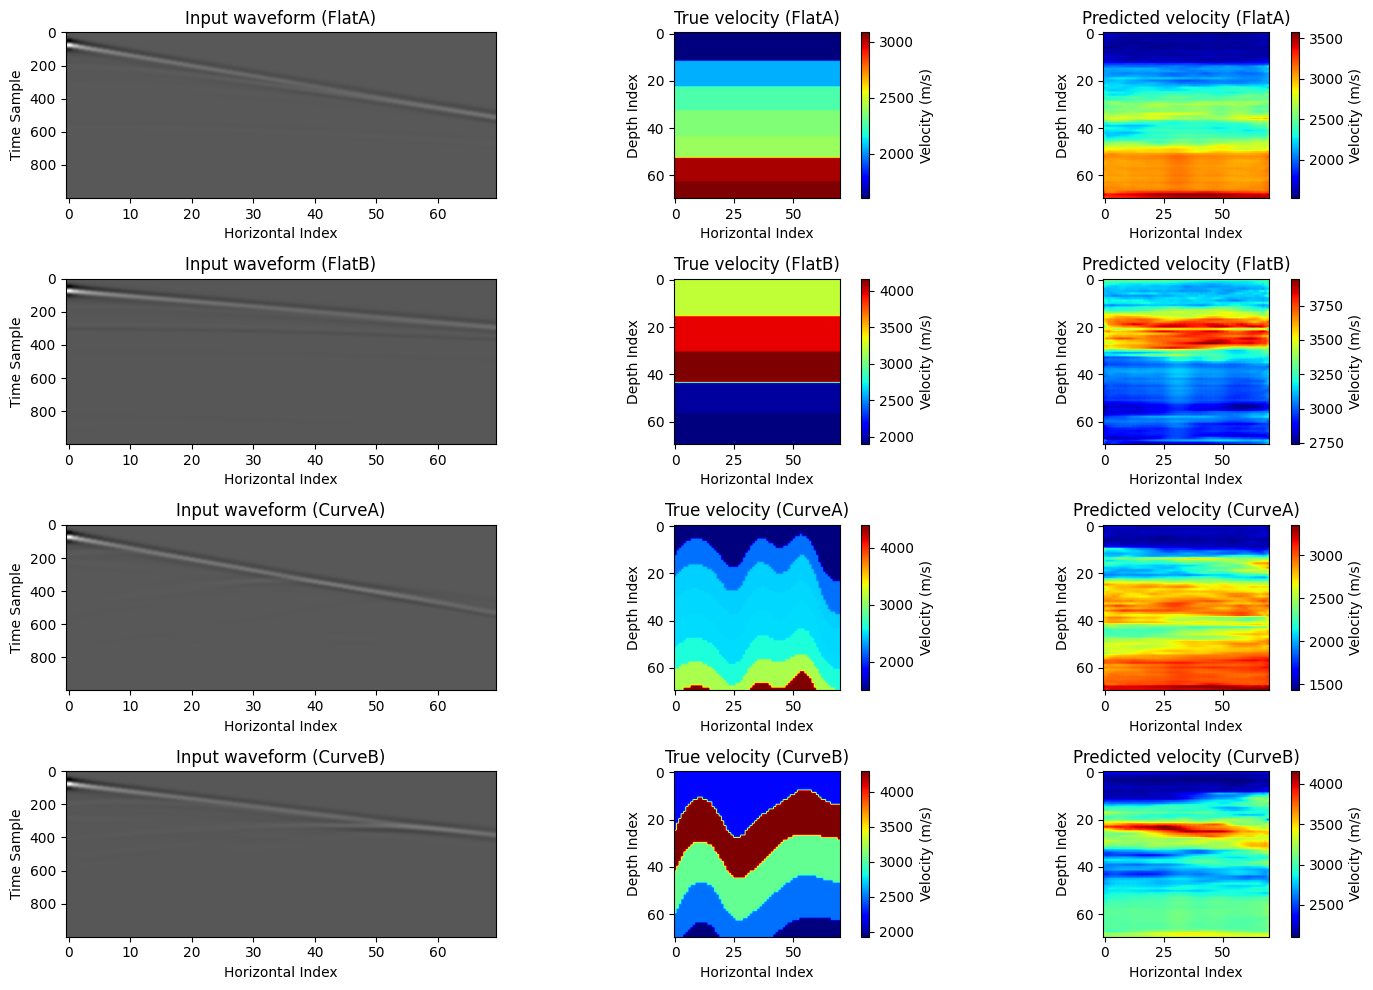

In [11]:
import matplotlib.pyplot as plt
model.eval()
with torch.no_grad():
    plt.figure(figsize=(14, 10))
    i = 1

    for name, (X_val, Y_val) in val_sets.items():
        # sample one batch
        val_dataset = torch.utils.data.TensorDataset(
            torch.tensor(X_val).float(), torch.tensor(Y_val).float()
        )
        val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8)
        xb, yb = next(iter(val_loader))

        xb = xb.to(device)
        yb = yb.to(device)
        pred = model(xb).cpu()[0, 0]

        # input
        plt.subplot(4, 3, i)
        plt.imshow(xb[0, 0].cpu(), aspect='auto', cmap='gray')
        plt.title(f"Input waveform ({name})")
        plt.xlabel("Horizontal Index")
        plt.ylabel("Time Sample")
        i += 1

        # true
        plt.subplot(4, 3, i)
        plt.imshow(yb[0, 0].cpu(), cmap='jet')
        plt.title(f"True velocity ({name})")
        plt.colorbar(label='Velocity (m/s)')
        plt.xlabel("Horizontal Index")
        plt.ylabel("Depth Index")
        i += 1

        # predicted
        plt.subplot(4, 3, i)
        plt.imshow(pred, cmap='jet')
        plt.title(f"Predicted velocity ({name})")
        plt.colorbar(label='Velocity (m/s)')
        plt.xlabel("Horizontal Index")
        plt.ylabel("Depth Index")
        i += 1

    plt.tight_layout()
    plt.show()
